# MODELO LINEAL

### AUTOR: CARLOS MOROCHO

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Cargamos el dataset
datos = pd.read_csv('DatosCOVID2020.csv', sep = ',')
datos

,muestras,muestras_pcr,muestras_pcr_nuevas,pruebas_rezagadas,muertes_confirmadas,muertes_probables,muertes,muertes_nuevas,positivas,positivas_pcr,...,defunciones_2017,defunciones_2017_nuevas,defunciones_2016,defunciones_2016_nuevas,defunciones_2015,defunciones_2015_nuevas,hospitalizadas_altas,hospitalizadas_estables,hospitalizadas_pronostico_reservadas,created_at
0,129,129,0,106,1,0,1,0,23,23,...,14506,217,13643,212,12866,167,0,0,1,13/03/2020
1,206,206,77,178,2,0,2,1,28,28,...,14718,212,13848,205,13047,181,0,7,3,14/03/2020
2,273,273,67,236,2,0,2,0,37,37,...,14926,208,14048,200,13228,181,0,7,2,15/03/2020
3,354,354,81,296,2,0,2,0,58,58,...,15164,238,14238,190,13388,160,0,9,5,16/03/2020
4,762,762,408,651,2,0,2,0,111,111,...,15347,183,14412,174,13550,162,0,9,5,17/03/2020
5,762,762,0,282,3,0,3,1,168,168,...,15555,208,14644,232,13736,186,0,10,6,18/03/2020
6,1153,1153,391,481,4,0,4,1,260,260,...,15789,234,14858,214,13919,183,3,12,5,19/03/2020
7,1670,1670,517,711,7,0,7,3,426,426,...,16013,224,15064,206,14105,186,3,10,7,20/03/2020
8,2051,2051,381,870,7,0,7,0,532,532,...,16234,221,15267,203,14273,168,3,5,15,21/03/2020
9,2360,2360,309,699,14,0,14,7,789,789,...,16456,222,15450,183,14450,177,3,54,17,22/03/2020


### 1) Predicción de nuevos casos positivos (Próxima semana, Próximo mes)

In [24]:
#Se filtran los datos para obtener solo los casos positivos
datos_infectados = datos.loc[:, ['positivas', 'created_at']]

#Expresar los datos de fecha en número de dias desde el inicio de año
formato = '%d/%m/%Y'
fecha = datos_infectados['created_at']
datos_infectados['created_at'] = fecha.map(lambda x: 
    (datetime.strptime(x, formato) - datetime.strptime('01/01/2020', formato)).days
)

datos_infectados

,positivas,created_at
0,23,72
1,28,73
2,37,74
3,58,75
4,111,76
5,168,77
6,260,78
7,426,79
8,532,80
9,789,81


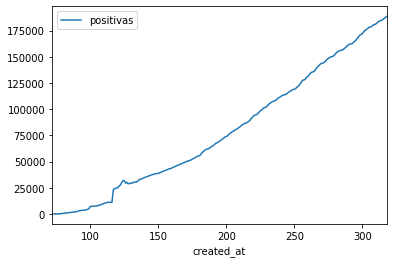

In [25]:
# Graficamos la cnatidad de infectados
datos_infectados.plot(x = 'created_at', y = 'positivas')

In [27]:
#Obtención de las variables para el entrenamiento
x = list(datos_infectados.iloc[:, 1]) #Fecha (Número de día)
y = list(datos_infectados.iloc[:, 0]) #Numero de infectados

#Creación y entranamiento del modelo
modelo_lineal = linear_model.LinearRegression()
modelo_lineal.fit(np.array(x).reshape(-1, 1), y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [727.08534877]
Independent term: 
 -66583.68254486444


El número de infectados el 10 de noviembre del 2020 será:  162448


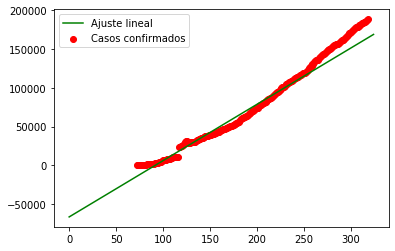

In [28]:
#Predicción para una semana
y_prediccion = regr.predict([[315]])
print("El número de infectados el 10 de noviembre del 2020 será: ", int(y_prediccion))

#Gráfica de los datos y la predicción para una semana
x_real = np.array(range(0, 325))

plt.scatter(x, y , color = 'red')
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color = 'green')
plt.legend(('Ajuste lineal', 'Casos confirmados'))
plt.show()

El número de infectados el 1 de diciembre del 2020 será:  177716


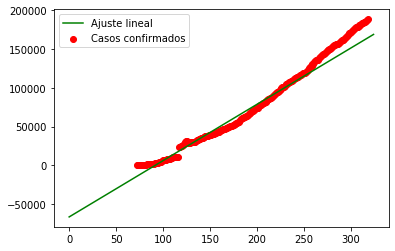

In [29]:
#Predicción para una semana
y_prediccion = regr.predict([[336]])
print("El número de infectados el 1 de diciembre del 2020 será: ", int(y_prediccion))

#Gráfica de los datos y la predicción para una semana
x_real = np.array(range(0, 325))

plt.scatter(x, y , color = 'red')
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color = 'green')
plt.legend(('Ajuste lineal', 'Casos confirmados'))
plt.show()

### 2) Predicción de casos con pacientes recuperados (Próxima semana, Próximo mes)

In [30]:
#Se filtran los datos para obtener solo los casos recuperados
datos_recuperados = datos.loc[:, ['hospitalizadas_altas', 'created_at']]

#Expresar los datos de fecha en número de dias desde el inicio de año
formato = '%d/%m/%Y'
fecha = datos_recuperados['created_at']
datos_recuperados['created_at'] = fecha.map(lambda x: 
    (datetime.strptime(x, formato) - datetime.strptime('01/01/2020', formato)).days
)

datos_recuperados

,hospitalizadas_altas,created_at
0,0,72
1,0,73
2,0,74
3,0,75
4,0,76
5,0,77
6,3,78
7,3,79
8,3,80
9,3,81


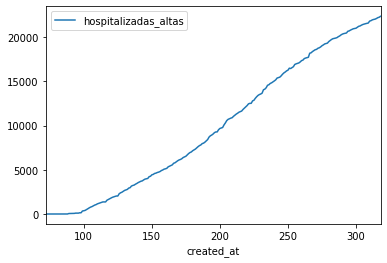

In [31]:
# Graficamos los pancientes recuerados
datos_recuperados.plot(x = 'created_at', y = 'hospitalizadas_altas')

In [32]:
#Obtención de las variables para el entrenamiento
x = list(datos_recuperados.iloc[:, 1]) #Fecha (Número de día)
y = list(datos_recuperados.iloc[:, 0]) #Numero de recuperados

#Creación y entranamiento del modelo
modelo_lineal = linear_model.LinearRegression()
modelo_lineal.fit(np.array(x).reshape(-1, 1), y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [727.08534877]
Independent term: 
 -66583.68254486444


El número de infectados el 10 de noviembre del 2020 será:  22366


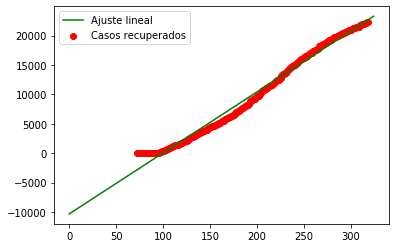

In [37]:
#Predicción para una semana
y_prediccion = modelo_lineal.predict([[315]])
print("El número de infectados el 10 de noviembre del 2020 será: ", int(y_prediccion))

#Gráfica de los datos y la predicción para una semana
x_real = np.array(range(0, 325))

plt.scatter(x, y , color = 'red')
plt.plot(x_real, modelo_lineal.predict(x_real.reshape(-1, 1)), color = 'green')
plt.legend(('Ajuste lineal', 'Casos recuperados'))
plt.show()

El número de infectados el 1 de diciembre del 2020 será:  24546


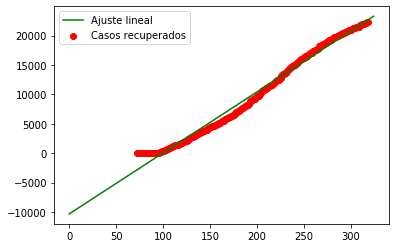

In [38]:
#Predicción para un mes
y_prediccion = modelo_lineal.predict([[336]])
print("El número de infectados el 1 de diciembre del 2020 será: ", int(y_prediccion))

#Gráfica de los datos y la predicción para un mes
x_real = np.array(range(0, 325))

plt.scatter(x, y , color = 'red')
plt.plot(x_real, modelo_lineal.predict(x_real.reshape(-1, 1)), color = 'green')
plt.legend(('Ajuste lineal', 'Casos recuperados'))
plt.show()

### Analisis

El sistema se implementará como una herramienta a tener presente ahora que nuestro país esta afrontando la crisis del coronavirus, estos modelo debe ser usado como referencia sobre el crecimiento de los casos y así tener una idea clara de las fechas en las que la situación empeorará o mejorará.

### Conclusion

Este sistema usa datos históricos para predecir el avance en número de infectados por coronavirus en el país, se consideran dos entradas, las fechas y el número total de casos, luego se realiza un entrenamiento de regresión lineal y logistica y generamos un posible número de infectados a futuro.

### Criterio personal (Político, económico y social de la situación)

Los casos sin duda ban en aumentos, pero aunque esto paresa desalenador existe un punto que estamos a punto de toca, el de maximo de infectados, actualmente las medidas en todo el mundo hacen que la gente incosientemente se proteja, claro no es suficiente pero almenos contrastara la gran tasa de infectadosque seguiremos viendo con el pasar de los dias hata que no llege una vacuna.
